In [60]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr
from math import sqrt
from statistics import mean

In [2]:
data_path = './data/'
df_X_train = pd.read_csv(data_path+'X_train.csv')#.drop(['COUNTRY'], axis=1).fillna(0) # given by the benchmark
df_X_test = pd.read_csv(data_path+'X_test.csv')
df_y_train = pd.read_csv(data_path+'Y_train.csv')

In [3]:
# French and Deutch sepration
df = pd.merge(df_X_train, df_y_train, on='ID')
df_X_train_fr = df.loc[df['COUNTRY'] == 'FR', df.columns[:-1]].drop(columns=['COUNTRY']).fillna(0)
df_y_train_fr = df.loc[df['COUNTRY'] == 'FR', ['ID', 'TARGET']]

df_X_train_de = df.loc[df['COUNTRY'] == 'DE', df.columns[:-1]].drop(columns=['COUNTRY']).fillna(0)
df_y_train_de = df.loc[df['COUNTRY'] == 'DE', ['ID', 'TARGET']]

df_X_test_fr = df_X_test.loc[df_X_test['COUNTRY'] == 'FR', df_X_test.columns].drop(columns=['COUNTRY']).fillna(0)
df_X_test_de = df_X_test.loc[df_X_test['COUNTRY'] == 'DE', df_X_test.columns].drop(columns=['COUNTRY']).fillna(0)


In [29]:
print(f"Number of samples for the french dataset: {df_X_train_fr.shape[0]}")
print(f"Number of samples for the german dataset: {df_X_train_de.shape[0]}")


Number of samples for the french dataset: 851
Number of samples for the german dataset: 643


<h3>Time series?</h3>

In [36]:
sorted_day_id = df_X_train_fr['DAY_ID'].to_list()
sorted_day_id.sort()
missing_day_ids = [day_id for day_id in list(range(0, 1216)) if day_id not in sorted_day_id]
print(1214 - len(df_X_train_fr)) # last_day_id less the number of samples -> number of missing days between id 1 and 1214
missing_day_ids

363


[4,
 6,
 9,
 10,
 13,
 17,
 19,
 24,
 30,
 32,
 33,
 35,
 39,
 43,
 44,
 45,
 51,
 54,
 56,
 63,
 67,
 69,
 79,
 80,
 84,
 85,
 95,
 100,
 103,
 111,
 113,
 115,
 123,
 128,
 129,
 132,
 133,
 136,
 139,
 142,
 148,
 153,
 156,
 160,
 161,
 164,
 167,
 171,
 173,
 174,
 176,
 177,
 190,
 193,
 196,
 200,
 202,
 208,
 210,
 211,
 213,
 216,
 218,
 226,
 233,
 234,
 235,
 241,
 244,
 245,
 252,
 254,
 255,
 256,
 259,
 260,
 261,
 265,
 271,
 275,
 288,
 291,
 295,
 299,
 300,
 301,
 306,
 316,
 317,
 324,
 326,
 332,
 334,
 338,
 339,
 342,
 350,
 352,
 358,
 360,
 369,
 370,
 372,
 373,
 375,
 376,
 382,
 386,
 388,
 390,
 392,
 394,
 395,
 397,
 402,
 404,
 405,
 407,
 410,
 411,
 415,
 421,
 428,
 432,
 433,
 435,
 438,
 440,
 441,
 447,
 448,
 451,
 452,
 455,
 458,
 459,
 464,
 468,
 472,
 475,
 477,
 483,
 484,
 485,
 488,
 489,
 499,
 502,
 507,
 513,
 518,
 520,
 524,
 527,
 528,
 531,
 532,
 541,
 546,
 548,
 551,
 559,
 563,
 569,
 570,
 571,
 572,
 576,
 577,
 588,
 590,
 597

In [35]:
sorted_day_id = df_X_train_de['DAY_ID'].to_list()
sorted_day_id.sort()
missing_day_ids = [day_id for day_id in list(range(0, 1216)) if day_id not in sorted_day_id]
print(1215 - df_X_test_de.shape[0]) # last_day_id less the number of samples -> number of missing days between id 1 and 1215
missing_day_ids

926


[0,
 1,
 4,
 6,
 9,
 10,
 13,
 15,
 17,
 18,
 19,
 24,
 28,
 29,
 30,
 32,
 33,
 35,
 39,
 43,
 44,
 45,
 47,
 48,
 50,
 51,
 52,
 54,
 56,
 58,
 59,
 63,
 64,
 65,
 67,
 69,
 75,
 76,
 79,
 80,
 84,
 85,
 89,
 90,
 91,
 95,
 100,
 103,
 110,
 111,
 113,
 114,
 115,
 119,
 123,
 125,
 126,
 128,
 129,
 132,
 133,
 136,
 138,
 139,
 140,
 141,
 142,
 145,
 148,
 151,
 153,
 156,
 157,
 159,
 160,
 161,
 164,
 167,
 171,
 173,
 174,
 176,
 177,
 182,
 185,
 186,
 190,
 193,
 196,
 197,
 200,
 202,
 206,
 208,
 210,
 211,
 212,
 213,
 215,
 216,
 218,
 224,
 226,
 227,
 228,
 233,
 234,
 235,
 238,
 241,
 242,
 244,
 245,
 248,
 249,
 252,
 254,
 255,
 256,
 259,
 260,
 261,
 264,
 265,
 271,
 273,
 275,
 283,
 288,
 291,
 295,
 299,
 300,
 301,
 303,
 306,
 308,
 312,
 313,
 314,
 316,
 317,
 321,
 322,
 323,
 324,
 326,
 332,
 334,
 335,
 338,
 339,
 342,
 343,
 350,
 352,
 354,
 358,
 360,
 362,
 366,
 367,
 368,
 369,
 370,
 372,
 373,
 375,
 376,
 379,
 382,
 383,
 385,
 386,
 388,
 

The data have a lot of missing values from day to day, the data are continuous over time, time series don't seems to be a good option

In [53]:
def show_spearman_correlation(y_predict, df_y_train):
    print(spearmanr(y_predict, df_y_train['TARGET']).correlation)

def get_spearman_cor(y_predict, df_y_train):
    return(spearmanr(y_predict, df_y_train['TARGET']).correlation)

Linear regression

In [29]:
model = LinearRegression()
df_X_train.drop(['COUNTRY'], axis=1).fillna(0)
# df_y_train['TARGET']
model.fit(df_X_train.drop(['COUNTRY'], axis=1).fillna(0), df_y_train['TARGET'])
# model.predict(df_X_train_fr)
show_spearman_correlation(model.predict(df_X_train.drop(['COUNTRY'], axis=1).fillna(0)), df_y_train)

0.278678665030059


french only

In [40]:
model = LinearRegression()
model.fit(df_X_train_fr, df_y_train_fr['TARGET'])
# model.predict(df_X_train_fr)
show_spearman_correlation(model.predict(df_X_train_fr), df_y_train_fr)

0.22230679657142144


de only

In [39]:
model = LinearRegression()
model.fit(df_X_train_de, df_y_train_de['TARGET'])
# model.predict(df_X_train_fr)
show_spearman_correlation(model.predict(df_X_train_de), df_y_train_de)

0.43857978910369905


Linear regression with regularization

In [59]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score

fr

In [55]:
model = Ridge(alpha=10)
model.fit(df_X_train_fr, df_y_train_fr['TARGET'])
y_predict_fr = model.predict(df_X_train_fr)
print(f"spearman with alpha=10 : {get_spearman_cor(y_predict_fr, df_y_train_fr)}")

spearman with alpha=10 : 0.23177915829632


1e-09
0.5
1
10
100
1000
10000
100000.0


/home/charles-m/Projects/master/ML for networks/project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.07539e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/charles-m/Projects/master/ML for networks/project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.09632e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/charles-m/Projects/master/ML for networks/project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08802e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/charles-m/Projects/master/ML for networks/project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matri

,alphas,cross-validation errors
0,1e-09,0.737425
1,0.5,0.736308
2,1,0.735943
3,10,0.733971
4,100,0.728906
5,1000,0.724144
6,10000,0.724342
7,100000.0,0.782527


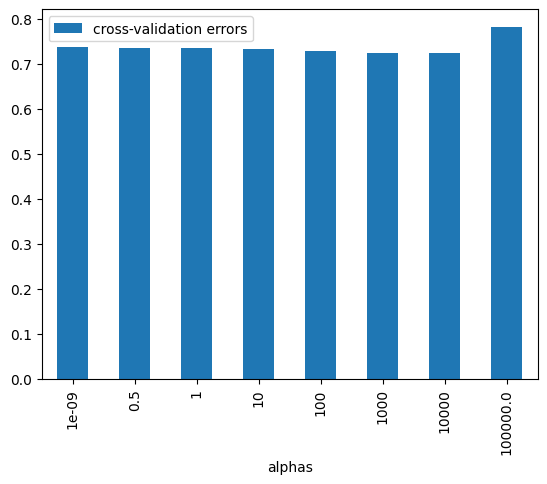

In [79]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=10)

alphas = [1e-9, 0.5, 1, 10, 100, 1000, 10000, 1e5] #, 1e6]
errors = []
# alphas = [5, 10, 15, 20, 25, 30, 50, 100]
for a in alphas:
    print(a)
    scores = cross_val_score(Ridge(alpha=a),
                df_X_train_fr, df_y_train_fr, cv=k_fold,
                scoring = 'neg_mean_squared_error')
    errors.append(sqrt(mean(-scores) ) )

# We convert x-values to string because otherwise they would
# be to far from each other
df_errors = pd.DataFrame({'alphas':[str(a) for a in alphas],
                        'cross-validation errors':errors})
ax = df_errors.plot.bar(x='alphas')
df_errors

In numerical analysis, the condition number of a function measures how much the output value of the function can change for a small change in the input argument. This is used to measure how sensitive a function is to changes or errors in the output, and how much error in the output results from an error in the input.

In [73]:
model = Ridge(alpha=15)
model.fit(df_X_train_fr, df_y_train_fr['TARGET'])
y_predict_fr = model.predict(df_X_train_fr)
print(f"spearman with alpha=1000 : {get_spearman_cor(y_predict_fr, df_y_train_fr)}")

spearman with alpha=1000 : 0.23196146737959214


de

In [93]:
model = Ridge(alpha=5) # 5 finded manually by trying several values
model.fit(df_X_train_de, df_y_train_de['TARGET'])
y_predict_de = model.predict(df_X_train_de)
print(f"spearman with alpha=5 : {get_spearman_cor(y_predict_de, df_y_train_de)}")

spearman with alpha=5 : 0.4414594599303667


Linear regression with cross validation

Polynomial regression

In [100]:
from sklearn.preprocessing import PolynomialFeatures

poly_var = PolynomialFeatures(degree=2).fit_transform(df_X_train_fr)
print(poly_var.shape)
lr = LinearRegression()
lr.fit(poly_var, df_y_train_fr['TARGET'])
y_predict_fr = lr.predict(poly_var)
show_spearman_correlation(y_predict_fr, df_y_train_fr)

(851, 630)
0.5399035699245784


In [101]:
from sklearn.preprocessing import PolynomialFeatures

poly_var = PolynomialFeatures(degree=2).fit_transform(df_X_train_de)
print(poly_var.shape)
lr = LinearRegression()
lr.fit(poly_var, df_y_train_de['TARGET'])
y_predict_de = lr.predict(poly_var)
show_spearman_correlation(y_predict_de, df_y_train_de)

(643, 630)
0.7735254179158632


Polynomial regression with regularization

Polynomial regression with cross validation

Neural networks